In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
swiggy_df=pd.read_csv("/content/swiggy.csv")
swiggy_df

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json
...,...,...,...,...,...,...,...,...,...,...,...
148536,553122,The Food Delight,Yavatmal,--,Too Few Ratings,₹ 200,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json
148537,562647,MAITRI FOODS & BEVERAGES,Yavatmal,--,Too Few Ratings,₹ 300,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json
148538,559435,Cafe Bella Ciao,Yavatmal,--,Too Few Ratings,₹ 300,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json
148539,418989,GRILL ZILLA,Yavatmal,--,Too Few Ratings,₹ 250,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json


In [ ]:
swiggy_df.shape

(148541, 11)

In [ ]:
swiggy_df.describe()

,id
count,148541.000000
mean,363466.378912
std,167890.977174
min,211.000000
25%,233320.000000
50%,412628.000000
75%,502223.000000
max,581031.000000


In [ ]:
swiggy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB


In [ ]:
swiggy_df.isnull().sum()

,0
id,0
name,86
city,0
rating,86
rating_count,86
cost,131
cuisine,99
lic_no,229
link,0
address,86


In [ ]:
#swiggy_df['cost'].unique()

array(['₹ 200', '₹ 100', '₹ 250', '₹ 150', '₹ 300', '₹ 700', '₹ 650',
       '₹ 400', '₹ 350', '₹ 60', '₹ 110', '₹ 399', '₹ 249', '₹ 500',
       '₹ 99', '₹ 120', '₹ 499', '₹ 299', '₹ 199', '₹ 50', '₹ 180',
       '₹ 349', '₹ 1000', '₹ 599', '₹ 600', '₹ 800', '₹ 450', '₹ 149',
       '₹ 290', '₹ 175', '₹ 125', '₹ 8', '₹ 375', '₹ 275', '₹ 425',
       '₹ 225', '₹ 325', '₹ 75', '₹ 160', '₹ 550', '₹ 220', '₹ 20',
       '₹ 59', '₹ 1200', '₹ 210', '₹ 30', '₹ 310', '₹ 70', '₹ 170',
       '₹ 449', '₹ 280', '₹ 320', '₹ 1300', '₹ 850', '₹ 900', '₹ 40',
       '₹ 1500', '₹ 140', '₹ 1100', '₹ 410', '₹ 80', '₹ 10', '₹ 1245',
       '₹ 510', '₹ 90', '₹ 260', '₹ 1800', '₹ 5', '₹ 240', '₹ 460',
       '₹ 1900', '₹ 352', '₹ 298', '₹ 2', '₹ 252', '₹ 330', '₹ 750',
       '₹ 130', '₹ 2000', '₹ 198', '₹ 230', '₹ 999', '₹ 3999', nan,
       '₹ 235', '₹ 1600', '₹ 55', '₹ 179', '₹ 129', '₹ 360', '₹ 85',
       '₹ 248', '₹ 270', '₹ 25', '₹ 159', '₹ 370', '₹ 1050', '₹ 49',
       '₹ 699', '₹ 340', '₹ 190', 

In [ ]:
#swiggy_df['rating_count'].value_counts()

,count
rating_count,
Too Few Ratings,87014
20+ ratings,21636
100+ ratings,20548
50+ ratings,12009
500+ ratings,4396
1K+ ratings,2739
5K+ ratings,98
10K+ ratings,15


In [ ]:
swiggy_df['cost']=swiggy_df['cost'].str.replace('₹', '', regex=False)
swiggy_df['cost']=swiggy_df['cost'].str.strip()

In [ ]:
rating_map = {
    "Too Few Ratings": 0,
    "20+ ratings": 20,
    "50+ ratings": 50,
    "100+ ratings": 100,
    "500+ ratings": 500,
    "1K+ ratings": 1000,
    "5K+ ratings": 5000,
    "10K+ ratings": 10000
}

swiggy_df['rating_count_num'] = swiggy_df['rating_count'].map(rating_map)
swiggy_df['rating_count_num']=swiggy_df['rating_count_num'].fillna(0)

In [ ]:
swiggy_df['rating_count']=pd.to_numeric(swiggy_df['rating_count'],errors='coerce')
swiggy_df['rating']=pd.to_numeric(swiggy_df['rating'],errors='coerce')
swiggy_df['cost']=pd.to_numeric(swiggy_df['cost'],errors='coerce')

<Axes: ylabel='Frequency'>

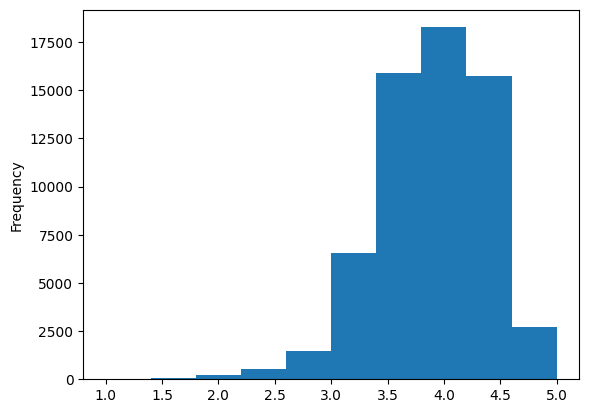

In [ ]:
swiggy_df['rating'].plot(kind='hist')

<Axes: >

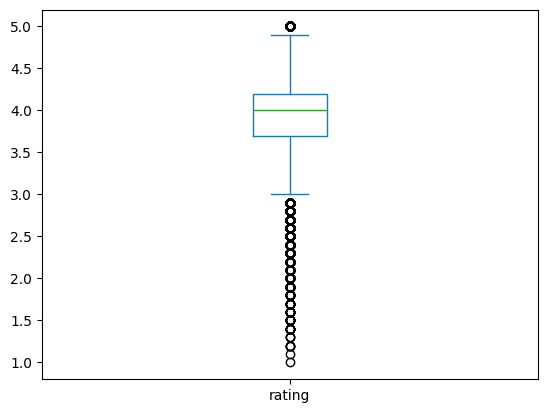

In [ ]:
swiggy_df['rating'].plot(kind='box')

<Axes: ylabel='Frequency'>

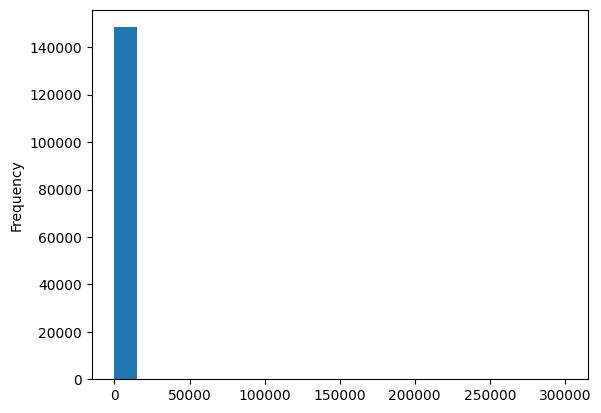

In [ ]:
swiggy_df['cost'].plot(kind='hist', bins=20)


<Axes: >

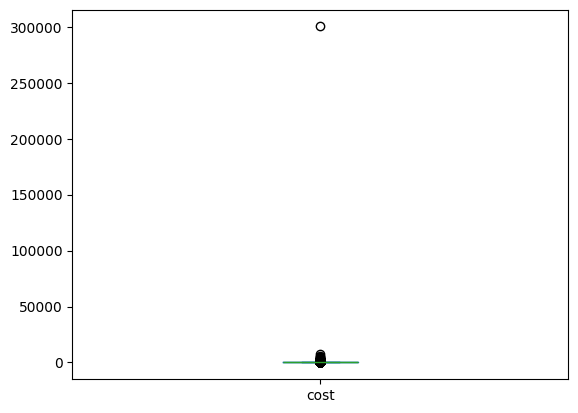

In [ ]:
swiggy_df['cost'].plot(kind='box')

<Axes: ylabel='Frequency'>

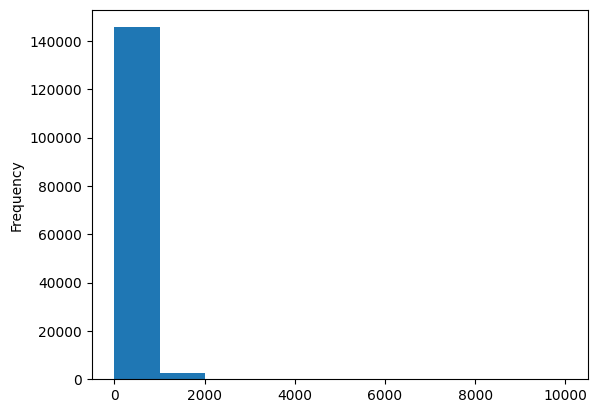

In [ ]:
swiggy_df['rating_count_num'].plot(kind='hist',bins=10)

<Axes: >

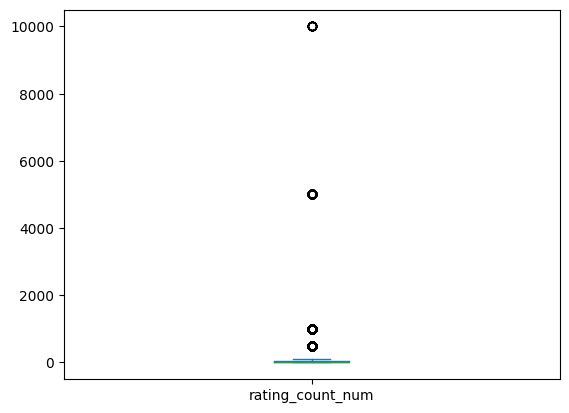

In [ ]:
swiggy_df['rating_count_num'].plot(kind='box')

In [ ]:
#Q1 = swiggy_df['cost'].quantile(0.25)
#Q3 = swiggy_df['cost'].quantile(0.75)
#IQR = Q3 - Q1

#upper_cap = Q3 + 1.5 * IQR

#swiggy_df['cost'] = swiggy_df['cost'].clip(upper=upper_cap)

In [ ]:
swiggy_df['rating'].fillna(swiggy_df['rating'].mean(),inplace=True)
swiggy_df['rating_count_num'].fillna(swiggy_df['rating_count_num'].median(),inplace=True)
swiggy_df['cost'].fillna(swiggy_df['cost'].median(),inplace=True)

/tmp/ipython-input-3657364843.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  swiggy_df['rating_count_num'].fillna(swiggy_df['rating_count_num'].median(),inplace=True)
/tmp/ipython-input-3657364843.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

<Axes: ylabel='Frequency'>

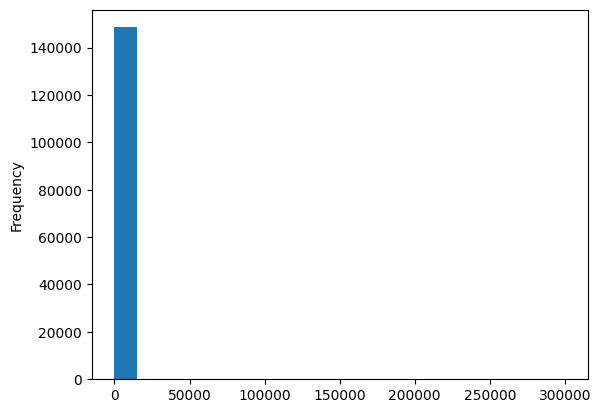

In [ ]:
swiggy_df['cost'].plot(kind='hist',bins=20)

In [ ]:
swiggy_df.isnull().sum()

,0
id,0
name,86
city,0
rating,0
rating_count,148541
cost,0
cuisine,99
lic_no,229
link,0
address,86


In [ ]:
swiggy_df.drop(columns=['rating_count'], inplace=True)

In [ ]:
swiggy_df.head()

,id,name,city,rating,cost,cuisine,lic_no,link,address,menu,rating_count_num
0,567335,AB FOODS POINT,Abohar,3.894461,200.0,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json,0.0
1,531342,Janta Sweet House,Abohar,4.400000,200.0,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json,50.0
2,158203,theka coffee desi,Abohar,3.800000,100.0,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json,100.0
3,187912,Singh Hut,Abohar,3.700000,250.0,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json,20.0
4,543530,GRILL MASTERS,Abohar,3.894461,250.0,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json,0.0


In [ ]:
swiggy_df.drop(columns=['id','lic_no','link','address','menu'], inplace=True)

In [ ]:
swiggy_df.head()

,name,city,rating,cost,cuisine,rating_count_num
0,AB FOODS POINT,Abohar,3.894461,200.0,"Beverages,Pizzas",0.0
1,Janta Sweet House,Abohar,4.400000,200.0,"Sweets,Bakery",50.0
2,theka coffee desi,Abohar,3.800000,100.0,Beverages,100.0
3,Singh Hut,Abohar,3.700000,250.0,"Fast Food,Indian",20.0
4,GRILL MASTERS,Abohar,3.894461,250.0,"Italian-American,Fast Food",0.0


<Axes: xlabel='city'>

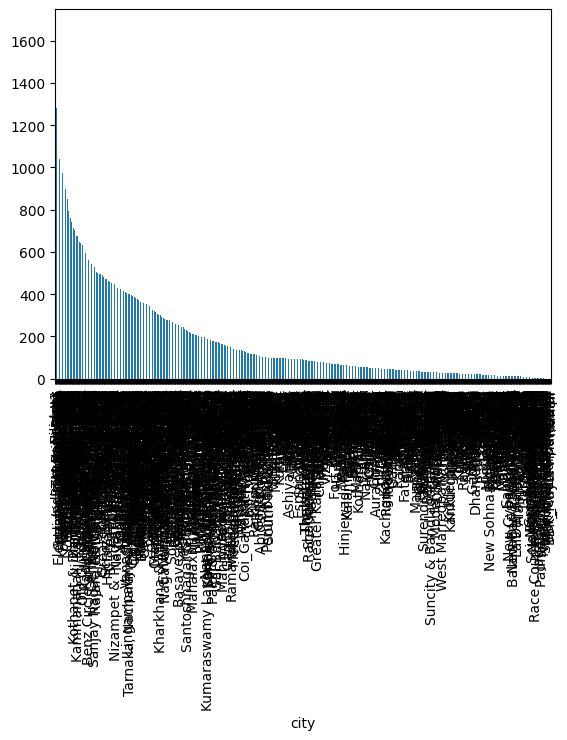

In [ ]:
swiggy_df['city'].value_counts().plot(kind='bar')


In [ ]:
#swiggy_df['name'].value_counts().plot(kind='bar')

In [ ]:
swiggy_df['name'].fillna(swiggy_df['name'].mode()[0],inplace=True)
swiggy_df['cuisine'].fillna(swiggy_df['cuisine'].mode()[0],inplace=True)




/tmp/ipython-input-3470757980.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  swiggy_df['name'].fillna(swiggy_df['name'].mode()[0],inplace=True)
/tmp/ipython-input-3470757980.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [ ]:
swiggy_df.isnull().sum()

,0
name,0
city,0
rating,0
cost,0
cuisine,0
rating_count_num,0


In [ ]:
swiggy_df.duplicated().sum()

np.int64(35)

In [ ]:
swiggy_df.drop_duplicates(inplace=True)

In [ ]:
swiggy_df.duplicated().sum()

np.int64(0)

In [ ]:
swiggy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148506 entries, 0 to 148540
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              148506 non-null  object 
 1   city              148506 non-null  object 
 2   rating            148506 non-null  float64
 3   cost              148506 non-null  float64
 4   cuisine           148506 non-null  object 
 5   rating_count_num  148506 non-null  float64
dtypes: float64(3), object(3)
memory usage: 7.9+ MB


In [ ]:
#swiggy_df[['cost', 'rating_count_num', 'rating']].skew()

,0
cost,0.362858
rating_count_num,17.241200
rating,-1.518069


In [ ]:
#swiggy_df['rating_count_log']=np.log1p(swiggy_df['rating_count_num'])

In [ ]:
#swiggy_df[['cost', 'rating_count_log', 'rating']].skew()

,0
cost,0.362858
rating_count_log,0.705348
rating,-1.518069


In [ ]:
#swiggy_df[['cost', 'rating', 'rating_count_log']].corr()

,cost,rating,rating_count_log
cost,1.000000,0.079655,0.086798
rating,0.079655,1.000000,0.070063
rating_count_log,0.086798,0.070063,1.000000


<Axes: xlabel='cost', ylabel='rating'>

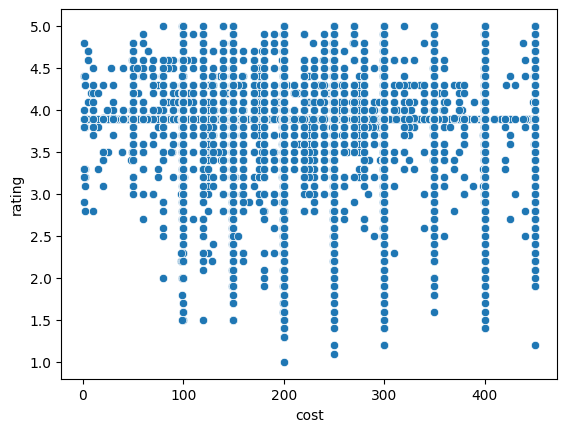

In [ ]:
#sns.scatterplot(x='cost', y='rating', data=swiggy_df)

In [ ]:
#top_cities = df['city'].value_counts().head(5).index
#sns.boxplot(x='city', y='rating', data=df[df['city'].isin(top_cities)])

In [ ]:
swiggy_df.head()

,name,city,rating,cost,cuisine,rating_count_num
0,AB FOODS POINT,Abohar,3.894461,200.0,"Beverages,Pizzas",0.0
1,Janta Sweet House,Abohar,4.400000,200.0,"Sweets,Bakery",50.0
2,theka coffee desi,Abohar,3.800000,100.0,Beverages,100.0
3,Singh Hut,Abohar,3.700000,250.0,"Fast Food,Indian",20.0
4,GRILL MASTERS,Abohar,3.894461,250.0,"Italian-American,Fast Food",0.0


In [ ]:
#swiggy_df.drop(columns=['rating_count_num'], inplace=True)

In [ ]:
swiggy_df['city'].unique()

array(['Abohar', 'Adilabad', 'Adityapur', 'Adoni', 'Agartala', 'Agra',
       'Vastrapur,Ahmedabad', 'GOTA,Ahmedabad',
       'Paldi & Ambawadi,Ahmedabad', 'Ghatlodia,Ahmedabad',
       'Bopal,Ahmedabad', 'Gandhinagar,Ahmedabad', 'LalDarwaja,Ahmedabad',
       'Naranpura,Ahmedabad', 'Navrangpura,Ahmedabad',
       'Science City,Ahmedabad', 'Maninagar,Ahmedabad',
       'Chandkheda,Ahmedabad', 'Ahmednagar', 'Aizawl', 'Ajmer', 'Akola',
       'Alappuzha', 'Aligarh', 'Alipurduar', 'Allahabad', 'Alwar',
       'Ambala', 'Ambikapur', 'Ambur', 'Amravati', 'Amreli', 'Amritsar',
       'Anand', 'Anantapur', 'Ankleshwar', 'Arakkonam', 'Arambagh',
       'Arrah', 'Aruppukottai', 'Asansol', 'Aurangabad',
       'Aurangabad_bihar', 'Azamgarh', 'Baddi', 'Bagalkot', 'Bagdogra',
       'Bahadurgarh', 'Bahraich', 'Balaghat', 'Balangir', 'Balasore',
       'Ballari', 'Balrampur', 'Balurghat', 'Banda',
       'Yeshwanthpur,Bangalore', 'Geddalahalli,Bangalore',
       'Koramangala,Bangalore', 'JP Nagar,B

In [ ]:
swiggy_df['city_clean']=swiggy_df['city'].apply(lambda x: x.split(',')[-1].strip())

In [ ]:
swiggy_df.drop(columns=['city'], inplace=True)

In [ ]:
swiggy_df.rename(columns={'city_clean':'city'},inplace=True)

In [ ]:
swiggy_df.head()

,name,rating,cost,cuisine,rating_count_num,city
0,AB FOODS POINT,3.894461,200.0,"Beverages,Pizzas",0.0,Abohar
1,Janta Sweet House,4.400000,200.0,"Sweets,Bakery",50.0,Abohar
2,theka coffee desi,3.800000,100.0,Beverages,100.0,Abohar
3,Singh Hut,3.700000,250.0,"Fast Food,Indian",20.0,Abohar
4,GRILL MASTERS,3.894461,250.0,"Italian-American,Fast Food",0.0,Abohar
